In [18]:
# Import the modules
# It is best to run this within a folder called "scripts"


import sys
print(sys.version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import string
# from dqdv_proc import DQDV
from scipy.integrate import cumtrapz
# Directories.

3.9.6 (default, Aug  9 2024, 14:24:13) 
[Clang 16.0.0 (clang-1600.0.26.3)]


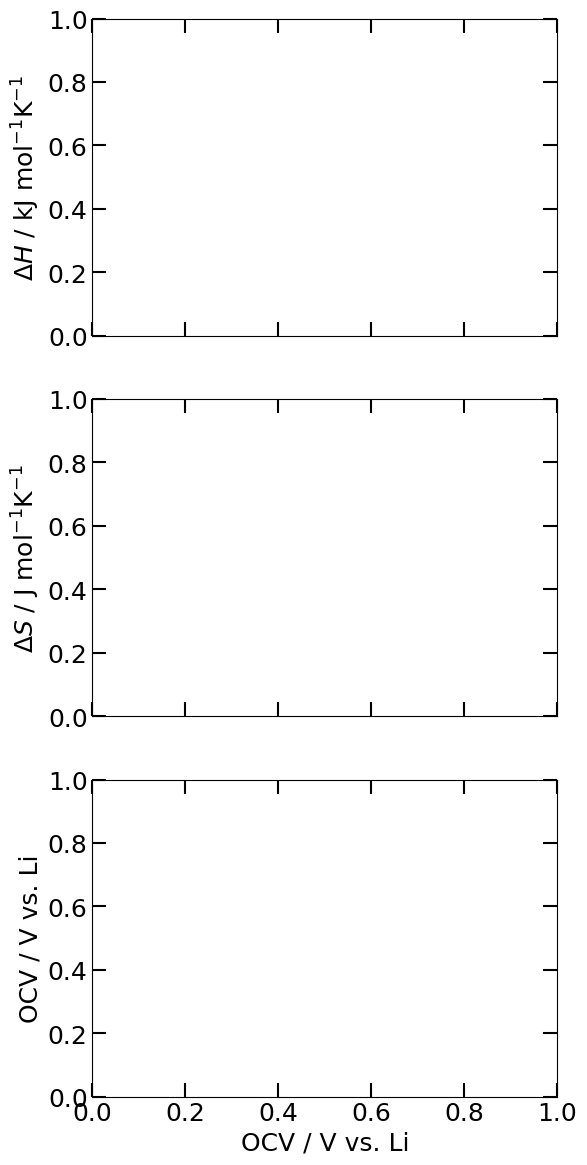

In [20]:
# Plot formatting initialisation

mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 4
font = {'size': 18}
mpl.rc('font', **font)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams.update({'errorbar.capsize': 2})
mpl.rcParams['legend.handlelength'] = 2
#********* change the path below to plot however many entropy plots you like.
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = 'col', figsize=(6,14)) 

ax1.set_ylabel(r'${\Delta}H$' +' / kJ mol'+'$^{-1}$' +'K'+'$^{-1}$')
ax2.set_ylabel(r'${\Delta}S$' +' / J mol'+'$^{-1}$' +'K'+'$^{-1}$')
ax3.set_xlabel('OCV / V vs. Li')
ax3.set_ylabel('OCV / V vs. Li')
ax1.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax1.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
ax2.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax2.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
ax3.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax3.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
# Physical constants.

left, bottom, width, height = [0.32, 0.18, 0.46, 0.3] #



In [21]:
# Define physical parameters

F = 96485.3329 # Faraday constant
T_K = 298 # Temperature in Kelvin

In [22]:
#Set file paths
entropy_path = '../data_reduced/' # You should save the csvs produced by Matlab in this folder. Basytec files in same directory.
figures_path = '../figures/'   # relative path where figures are saved
temp_dirs = [entropy_path + 'AMTE_Gr_10SiOx/',
             entropy_path + 'AMTE_Gr_15SiOx/', 
             entropy_path + 'AMTE_Gr_60SiOx/',
             entropy_path + 'AMTE_Gr_80SiOx/',
             entropy_path + 'AMTE_SiOx_SEI_Entropy/'] # Add the files to be plotted here.
labels = ['10 %','15 %','60 %','80 %', 'SiOx'] # You can customise the legend labels here.
method = 'M1'
entropy_file_dict = {}
basytec_file_dict = {}

In [23]:
# Generate Pandas dataframes 
for index,(directory) in enumerate(temp_dirs):
    file_list = os.listdir(directory)
    entropy_file_dict.update({index: directory + f for f in file_list if f.endswith('entropy.csv')})
    basytec_file_dict.update({index: directory + f for f in file_list if f.endswith('txt')})  # Puts all the files into a dictionary.
    print(entropy_file_dict.values())

dict_values(['../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv'])
dict_values(['../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv', '../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv'])
dict_values(['../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv', '../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv', '../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv'])
dict_values(['../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv', '../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv', '../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv', '../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv'])
dict_values(['../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37

0 ../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
1 ../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
2 ../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv
3 ../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv
4 ../data_reduced/AMTE_SiOx_SEI_Entropy/discharge_entropy_20mins_SiOx_5Eentropy.csv
../data_reduced/AMTE_SiOx_SEI_Entropy/discharge_entropy_20mins_SiOx_5Eentropy.csv


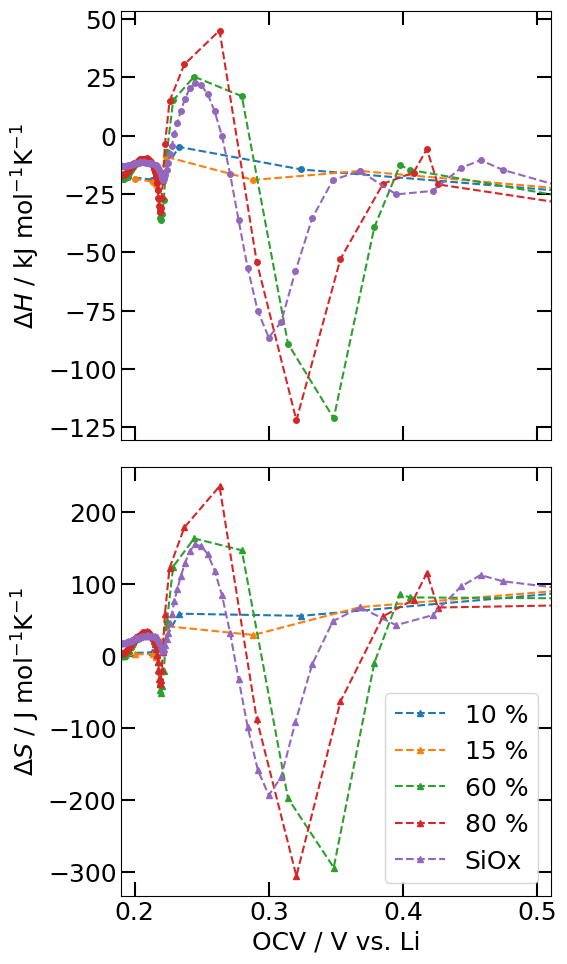

In [29]:
# Plot formatting: plots versus voltage

fig, (ax1, ax2) = plt.subplots(2,1, sharex = 'col', figsize=(6,10)) 

ax1.set_ylabel(r'${\Delta}H$' +' / kJ mol'+'$^{-1}$' +'K'+'$^{-1}$')
ax2.set_ylabel(r'${\Delta}S$' +' / J mol'+'$^{-1}$' +'K'+'$^{-1}$')
ax2.set_xlabel('OCV / V vs. Li')
ax1.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax1.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
ax2.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax2.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
# Physical constants.

left, bottom, width, height = [0.32, 0.18, 0.46, 0.3] #

ax1.set_xlim([0.19,0.51]) # Reconfigure limits.

# Plot on voltage axis

for key,f_path in entropy_file_dict.items():
    print(key, entropy_file_dict[key])
    entropy_file = entropy_file_dict[key]
    basytec_file = basytec_file_dict[key]
    print(entropy_file)
    df_e = pd.read_csv(entropy_file, encoding='latin')
    df_b = pd.read_csv(basytec_file, skiprows=12, encoding='latin')
    mass = df_b['Ah[Ah]'].iloc[-1] / df_b['Ah[Ah/kg]'].iloc[-1]  # Mass in kg.
    df_e['SOC'] = df_e['Charge/Discharge [mAh]'] / (df_e['Charge/Discharge [mAh]'].iloc[-1]) 

    df_e[method +' Enthalpy [J mol-1]'] = - F * df_e['OCV [V]   '] + T_K * df_e[method +' Entropy [J mol-1 K-1]']
    cap_max = df_e['Charge/Discharge [mAh]'].max()
    ax1.plot(df_e['OCV [V]   '].iloc[1:-1]*1000,df_e['%s Enthalpy [J mol-1]' % method][1:-1],linestyle='--',marker='o',color=colors[key], label = labels[key])

    ax2.plot(df_e['OCV [V]   '].iloc[1:-1]*1000,df_e['%s Entropy [J mol-1 K-1]' % method][1:-1]*1000,linestyle='--',marker='^',color=colors[key], label = labels[key])

    new_df = pd.DataFrame()
    new_df['OCV'] = df_e['OCV [V]   '] * 1000        
    new_df['Cap (mAh/g)'] = df_e['Charge/Discharge [mAh]']/mass
    new_df['deltaH (kJ/mol)'] = df_e['%s Enthalpy [J mol-1]'%method] *1000
    new_df['deltaS (J/mol/K)'] = df_e['%s Entropy [J mol-1 K-1]'%method]*1000
    new_df.to_csv('output_%s.csv' % key) # You can rename this manually.
    df_e.to_csv('data_entropy_%s_cap.csv' % key) 

ax2.legend()


plt.tight_layout()
f_index = 0
f_name = 'plot_wrt_voltage_0.png'
while os.path.isfile(figures_path + f_name):
    f_index += 1
    f_name = 'plot_wrt_voltage_%d.png' % f_index
plt.savefig(figures_path + f_name)
plt.show()

0 ../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
1 ../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
2 ../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv
3 ../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv
4 ../data_reduced/AMTE_SiOx_SEI_Entropy/discharge_entropy_20mins_SiOx_5Eentropy.csv
../data_reduced/AMTE_SiOx_SEI_Entropy/discharge_entropy_20mins_SiOx_5Eentropy.csv


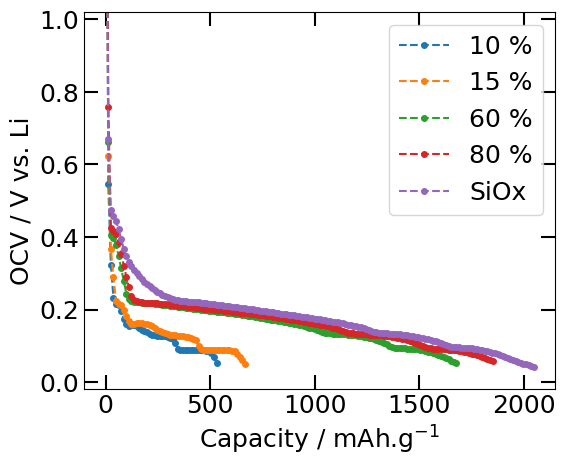

In [30]:
# Plot formatting: plots versus capacity

fig, (ax1) = plt.subplots(1,1, sharex = 'col', figsize=(6,5)) 

ax1.set_xlabel(r'Capacity / mAh.g$^{-1}$')
ax1.set_ylabel('OCV / V vs. Li')
ax1.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax1.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
# Physical constants.

ax1.set_ylim([-0.02,1.02])

left, bottom, width, height = [0.32, 0.18, 0.46, 0.3] #

# Plot on capacity axis

for key,f_path in entropy_file_dict.items():
    print(key, entropy_file_dict[key])
    entropy_file = entropy_file_dict[key]
    basytec_file = basytec_file_dict[key]
    print(entropy_file)
    df_e = pd.read_csv(entropy_file, encoding='latin')
    df_b = pd.read_csv(basytec_file, skiprows=12, encoding='latin')
    mass = 1000 * (df_b['Ah[Ah]'].iloc[-1] / df_b['Ah[Ah/kg]'].iloc[-1])  # Mass in g.
    df_e['SOC'] = df_e['Charge/Discharge [mAh]'] / (df_e['Charge/Discharge [mAh]'].iloc[-1]) 

    df_e[method +' Enthalpy [J mol-1]'] = - F * df_e['OCV [V]   '] + T_K * df_e[method +' Entropy [J mol-1 K-1]']
    cap_max = df_e['Charge/Discharge [mAh]'].max()
    ax1.plot(df_e['Charge/Discharge [mAh]']/mass,  df_e['OCV [V]   ']*1000,linestyle='--',marker='o',color=colors[key], label = labels[key])

    new_df = pd.DataFrame()
    new_df['OCV'] = df_e['OCV [V]   '] * 1000        
    new_df['Cap (mAh/g)'] = df_e['Charge/Discharge [mAh]']/mass
    new_df['deltaH (kJ/mol)'] = df_e['%s Enthalpy [J mol-1]'%method] *1000
    new_df['deltaS (J/mol/K)'] = df_e['%s Entropy [J mol-1 K-1]'%method]*1000
    new_df.to_csv('output_%s.csv' % key) # You can rename this manually.
    df_e.to_csv('data_entropy_%s_cap.csv' % key) 

ax1.legend()


plt.tight_layout()
f_index = 0
f_name = 'plot_wrt_capacity_0.png'
while os.path.isfile(figures_path + f_name):
    f_index += 1
    f_name = 'plot_wrt_capacity_%d.png' % f_index
plt.savefig(figures_path + f_name)
plt.show()

0 ../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_10SiOx/AMTEGr10SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
1 ../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_15SiOx/AMTEGr15SiOx_1A_SEI_dch_ent_37mAg_20minsentropy.csv
2 ../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_60SiOx/Gr-SiOx-60-2_discharge_entropy_37mAg_20minsentropy.csv
3 ../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv
../data_reduced/AMTE_Gr_80SiOx/Gr-SiOx-80-1_discharge_entropy_37mAg_20minsentropy.csv
4 ../data_reduced/AMTE_SiOx_SEI_Entropy/discharge_entropy_20mins_SiOx_5Eentropy.csv
../data_reduced/AMTE_SiOx_SEI_Entropy/discharge_entropy_20mins_SiOx_5Eentropy.csv


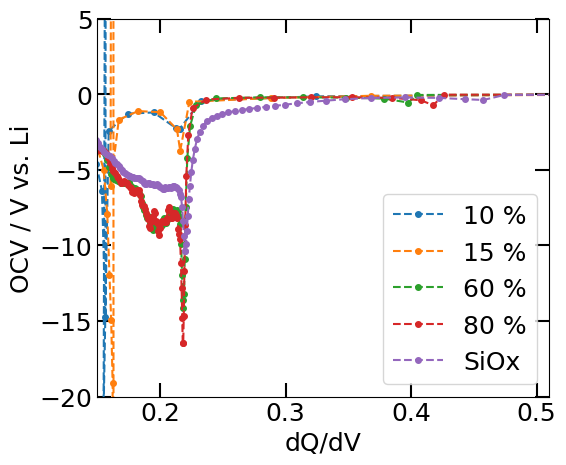

In [34]:
# Plot formatting: plot dqdv

fig, (ax1) = plt.subplots(1,1, sharex = 'col', figsize=(6,5)) 

ax1.set_xlabel('dQ/dV')
ax1.set_ylabel('OCV / V vs. Li')
ax1.tick_params(which='both', length=10, width=1.5, direction='in',top=True,right=True)
ax1.tick_params(which='minor', length=5, width=1.0, direction='in',top=True,right=True,left=True,bottom=True)
# Physical constants.

ax1.set_ylim([-20,5])
ax1.set_xlim([0.15,0.51])
left, bottom, width, height = [0.32, 0.18, 0.46, 0.3] #

# Plot on capacity axis

for key,f_path in entropy_file_dict.items():
    print(key, entropy_file_dict[key])
    entropy_file = entropy_file_dict[key]
    basytec_file = basytec_file_dict[key]
    print(entropy_file)
    df_e = pd.read_csv(entropy_file, encoding='latin')
    df_b = pd.read_csv(basytec_file, skiprows=12, encoding='latin')
    mass = 1000 * (df_b['Ah[Ah]'].iloc[-1] / df_b['Ah[Ah/kg]'].iloc[-1])  # Mass in g.
    df_e['SOC'] = df_e['Charge/Discharge [mAh]'] / (df_e['Charge/Discharge [mAh]'].iloc[-1]) 

    df_e[method +' Enthalpy [J mol-1]'] = - F * df_e['OCV [V]   '] + T_K * df_e[method +' Entropy [J mol-1 K-1]']
    cap_max = df_e['Charge/Discharge [mAh]'].max()
    q = df_e['Charge/Discharge [mAh]'] / cap_max

    dqdv = np.gradient(q) / (np.gradient(df_e['OCV [V]   '] * 1000))

    
    ax1.plot(df_e['OCV [V]   ']*1000,dqdv,linestyle='--',marker='o',color=colors[key], label = labels[key])

    new_df = pd.DataFrame()
    new_df['OCV'] = df_e['OCV [V]   '] * 1000        
    new_df['Cap (mAh/g)'] = df_e['Charge/Discharge [mAh]']/mass
    new_df['deltaH (kJ/mol)'] = df_e['%s Enthalpy [J mol-1]'%method] *1000
    new_df['deltaS (J/mol/K)'] = df_e['%s Entropy [J mol-1 K-1]'%method]*1000
    new_df.to_csv('output_%s.csv' % key) # You can rename this manually.
    df_e.to_csv('data_entropy_%s_cap.csv' % key) 

ax1.legend()


plt.tight_layout()
f_index = 0
f_name = 'plot_wrt_dqdv_0.png'
while os.path.isfile(figures_path + f_name):
    f_index += 1
    f_name = 'plot_wrt_dqdv_%d.png' % f_index
plt.savefig(figures_path + f_name)
plt.show()